In [ ]:
import numpy as np
from sklearn import datasets

#Classificador Multilayer Perceptron - função de decisão com um limiar para
# ativar o desativar o neurônio
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#Dataset
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
dados=pd.read_csv('/content/drive/MyDrive/MESTRADO/#Reuniões Dissertação/dataset1k+dados_ambiente.csv')

#Substituindo ',' ou '.' nos dados
dados['time_repair']=dados['time_repair'].str.replace(',', '.')
dados['cost']=dados['cost'].str.replace(',', '.')
dados['criticality']=dados['criticality'].str.replace(',', '.')

#Fazendo conversão de tipos (objetct para float)
dados['time_repair']=dados['time_repair'].astype(float)
dados['cost']=dados['cost'].astype(float)
dados['criticality']=dados['criticality'].astype(float)

Mounted at /content/drive


In [ ]:
dados

,machine_id,type_of_failure,timestamp,time_repair,cost,criticality,humid,temp,label
0,81,7,1583193600,0.363742,0.522,0.499,61,97,0
1,66,5,1593388800,0.297000,0.485,0.307,63,112,0
2,32,9,1600128000,0.383106,-0.075,0.798,6,40,1
3,43,4,1597708800,0.300732,0.553,0.531,48,141,0
4,62,2,1585699200,0.127000,0.335,0.367,74,148,0
...,...,...,...,...,...,...,...,...,...
9994,34,3,1599350400,0.391921,0.518,0.508,6,56,0
9995,78,3,1598918400,0.102000,0.494,0.272,56,88,0
9996,81,9,1595376000,0.339469,0.277,0.456,80,142,0
9997,97,7,1600905600,0.277222,0.457,0.424,61,99,0


In [ ]:
#Pré-processamento
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
normalizados = pd.DataFrame( scaler.fit_transform(dados), columns=dados.columns )


In [ ]:
# machine_id	type_of_failure	timestamp	time_repair	cost	criticality	label
dataframe_dados = pd.DataFrame()
dataframe_dados['machine_id'] = normalizados['machine_id']
dataframe_dados['type_of_failure'] = normalizados['type_of_failure']
dataframe_dados['timestamp'] = normalizados['timestamp']
dataframe_dados['time_repair'] = normalizados['time_repair']
dataframe_dados['cost'] = normalizados['cost']
dataframe_dados['criticality'] = normalizados['criticality']


#Pré-processamento
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
normalizados=pd.DataFrame(scaler.fit_transform(dados), columns=dados.columns)

# Divisão do dataset em dados de treino e teste
X_treino=dataframe_dados[:7500]
X_teste=dataframe_dados[7501:]

# Adição da coluna labeal do DataFrame
dataframe_labels = pd.DataFrame()
dataframe_labels['label'] = normalizados['label']

# Divisão do dataset em dados de treino e teste
y_treino = dataframe_labels[:7500]
y_teste = dataframe_labels[7501:]

In [ ]:
#Declarando o classificador
# solver='sgd' => Gradiente descrescente estocástico
# hidden_layer_sizes=(3,) => 1 camada escondida com 3 neurônios
# learning_rate_init=0.1 => taxa de aprendizagem
# activation='logistic' => tipo de ativação do neurônio
# max_iter=1500 => número máximo de interações
clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(3,), learning_rate_init=0.1, activation='logistic', max_iter=1500, random_state=1)

#Os ajustes são manuais dos parâmetros do classificador
#Treinar classificador
clf.fit(X_treino, y_treino)

# Probabilidade de cada elemento ser de uma determinada classe
y_pred = clf.predict_proba(X_teste)

#Verificando a acurárica do modelo
y_aux = np.argmax(y_pred, 1)
accuracy_score(y_teste, y_aux)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9975980784627703

In [ ]:
from sklearn.model_selection import cross_val_score

# Realizar a validação cruzada
scores = cross_val_score(clf, y_teste, y_aux, cv=8)  # cv é o número de folds

# Exibir os resultados
print("Accuracy scores for each fold:", scores)
print("Mean cross-validation score:", scores.mean())

Accuracy scores for each fold: [0.99680511 1.         0.99679487 0.99679487 1.         0.99679487
 0.99679487 0.99679487]
Mean cross-validation score: 0.9975974338494307


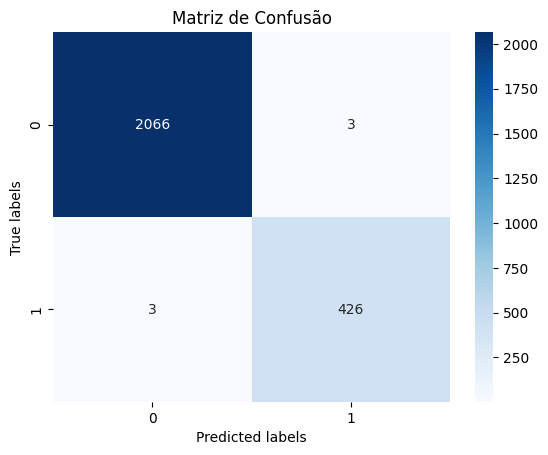

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_teste, y_aux)

# Visualizando a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusão')
plt.show()


Códigos copiados apenas para tradução

In [ ]:
#Preprocessing
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
normalized=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Splitting the dataset into training and testing data
X_train=dataframe_data[:7500]
X_test=dataframe_data[7501:]

# Adding the DataFrame label column
dataframe_labels = pd.DataFrame()
dataframe_labels['label'] = normalized['label']

# Splitting the dataset into training and testing data
y_train = dataframe_labels[:7500]
y_test = dataframe_labels[7501:]



